In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

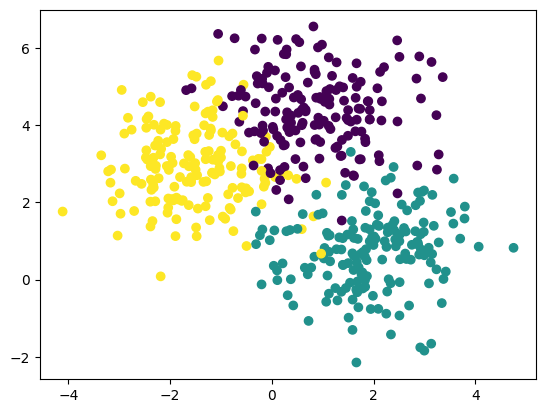

In [ ]:
# Generate data points
X, y = make_blobs(n_samples=500, centers=3, random_state=0)

# Plot the data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=y)  # X[:, 0] is first feature, X[:, 1] is second feature

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

# Generate 500 data points
X, _ = make_blobs(n_samples=100, centers=5, random_state=42)

# Apply ensemble clustering
k_values = [2, 3, 4]
base_cluster_solutions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    base_cluster_solutions.append(labels)

# Generate co-association matrix
n = X.shape[0]
m = len(k_values)
co_assoc_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(i, n):
        val = sum(base_cluster_solutions[k][i] == base_cluster_solutions[k][j] for k in range(m))
        co_assoc_matrix[i][j] = co_assoc_matrix[j][i] = val

# Apply hierarchical clustering
hc = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='average')
final_labels = hc.fit_predict(1 - co_assoc_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


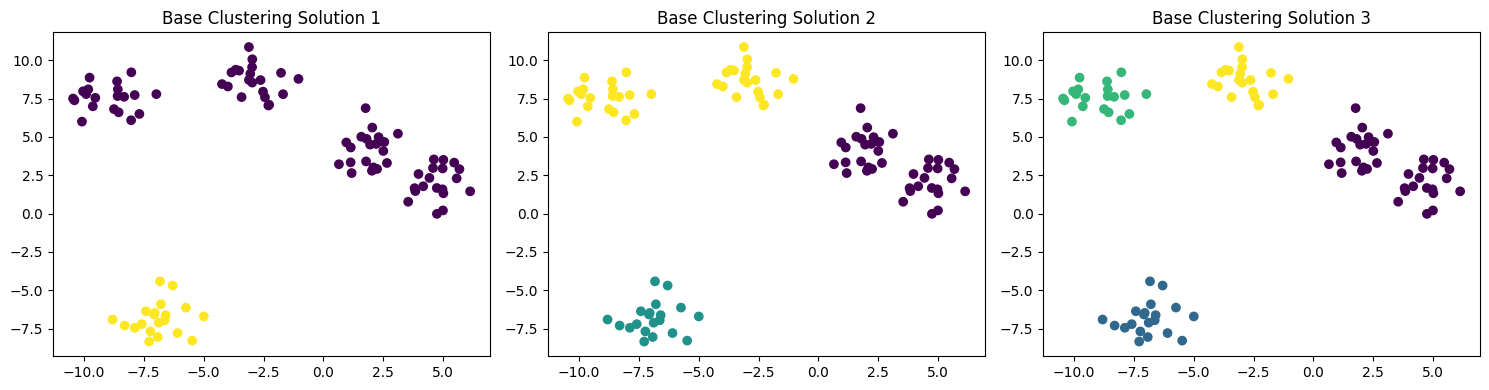

Co-association Matrix:
[[3. 0. 0. ... 0. 0. 0.]
 [0. 3. 1. ... 1. 3. 3.]
 [0. 1. 3. ... 3. 1. 1.]
 ...
 [0. 1. 3. ... 3. 1. 1.]
 [0. 3. 1. ... 1. 3. 3.]
 [0. 3. 1. ... 1. 3. 3.]]


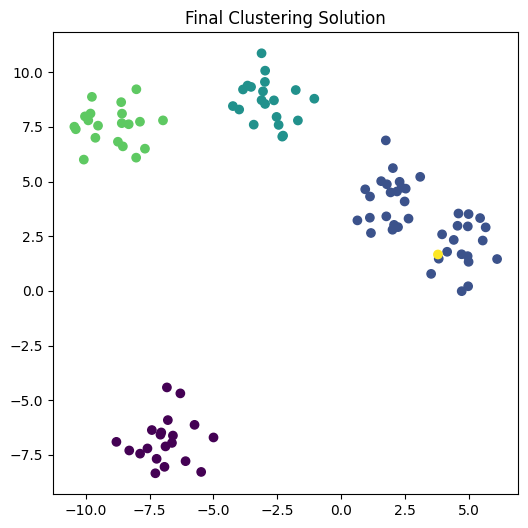

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot each base clustering solution
plt.figure(figsize=(15, 4))
for i, labels in enumerate(base_cluster_solutions, 1):
    plt.subplot(1, len(base_cluster_solutions), i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(f'Base Clustering Solution {i}')

plt.tight_layout()
plt.show()

# Print co-association matrix
print("Co-association Matrix:")
print(co_assoc_matrix)

# Plot final clustering solution
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis')
plt.title('Final Clustering Solution')
plt.show()
